In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [2]:
pd.set_option('display.max_columns', None)
df_bujanovac = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\bujanovac_weather_2014-2024.csv")

In [3]:
#sort index
df_bujanovac = df_bujanovac.sort_index()

## Descriptive statistics and EDA

In [4]:
df_bujanovac.shape

(3793, 34)

In [5]:
df_bujanovac.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [6]:
df_bujanovac['datetime'].min()

'2014-01-01'

In [7]:
df_bujanovac['datetime'].max()

'2024-05-20'

In [8]:
df_bujanovac['temp'].min()

-15.7

In [9]:
df_bujanovac['temp'].max()

29.3

In [10]:
df_bujanovac.dtypes

Unnamed: 0            int64
name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [11]:
df_bujanovac.isna().sum()

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1738
snow                   0
snowdepth              0
windgust             330
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [12]:
print(df_bujanovac.head())

   Unnamed: 0               name    datetime  tempmax  tempmin  temp  \
0           0  Bujanovac, Serbia  2014-01-01      6.6      2.4   4.3   
1           1  Bujanovac, Serbia  2014-01-02      7.6      1.6   3.7   
2           2  Bujanovac, Serbia  2014-01-03      5.7      1.4   3.3   
3           3  Bujanovac, Serbia  2014-01-04      4.0      0.8   2.5   
4           4  Bujanovac, Serbia  2014-01-05      5.3      0.7   3.3   

   feelslikemax  feelslikemin  feelslike  dew  humidity  precip  precipprob  \
0           6.6           0.0        3.8  2.1      86.2   0.000           0   
1           7.6           0.5        3.5  1.0      83.1   0.000           0   
2           5.7           1.4        3.2  1.4      87.0   0.000           0   
3           4.0          -2.2        1.7  1.3      91.8   0.000           0   
4           5.3          -2.6        1.2  1.8      90.1   0.121         100   

   precipcover preciptype  snow  snowdepth  windgust  windspeed  winddir  \
0         0.00  

In [14]:
print(df_bujanovac.describe())

        Unnamed: 0      tempmax      tempmin         temp  feelslikemax  \
count  3793.000000  3793.000000  3793.000000  3793.000000    3793.00000   
mean   1896.000000    18.399815     6.444846    12.222832      17.90464   
std    1095.089114     9.664108     7.428643     8.355306       9.87085   
min       0.000000   -10.400000   -25.500000   -15.700000     -17.20000   
25%     948.000000    10.600000     0.800000     5.600000      10.60000   
50%    1896.000000    18.600000     6.500000    12.400000      18.60000   
75%    2844.000000    26.300000    12.900000    19.400000      26.30000   
max    3792.000000    38.600000    22.200000    29.300000      38.30000   

       feelslikemin    feelslike          dew     humidity       precip  \
count   3793.000000  3793.000000  3793.000000  3793.000000  3793.000000   
mean       5.334010    11.569839     5.806327    69.095544     1.933817   
std        8.465514     9.001397     6.695374    12.758273     6.177629   
min      -32.500000   -2

In [15]:
print(df_bujanovac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3793 non-null   int64  
 1   name              3793 non-null   object 
 2   datetime          3793 non-null   object 
 3   tempmax           3793 non-null   float64
 4   tempmin           3793 non-null   float64
 5   temp              3793 non-null   float64
 6   feelslikemax      3793 non-null   float64
 7   feelslikemin      3793 non-null   float64
 8   feelslike         3793 non-null   float64
 9   dew               3793 non-null   float64
 10  humidity          3793 non-null   float64
 11  precip            3793 non-null   float64
 12  precipprob        3793 non-null   int64  
 13  precipcover       3793 non-null   float64
 14  preciptype        2055 non-null   object 
 15  snow              3793 non-null   float64
 16  snowdepth         3793 non-null   float64


In [16]:
print(df_bujanovac.isnull().sum())

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1738
snow                   0
snowdepth              0
windgust             330
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


In [17]:
df_bujanovac.dtypes

Unnamed: 0            int64
name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

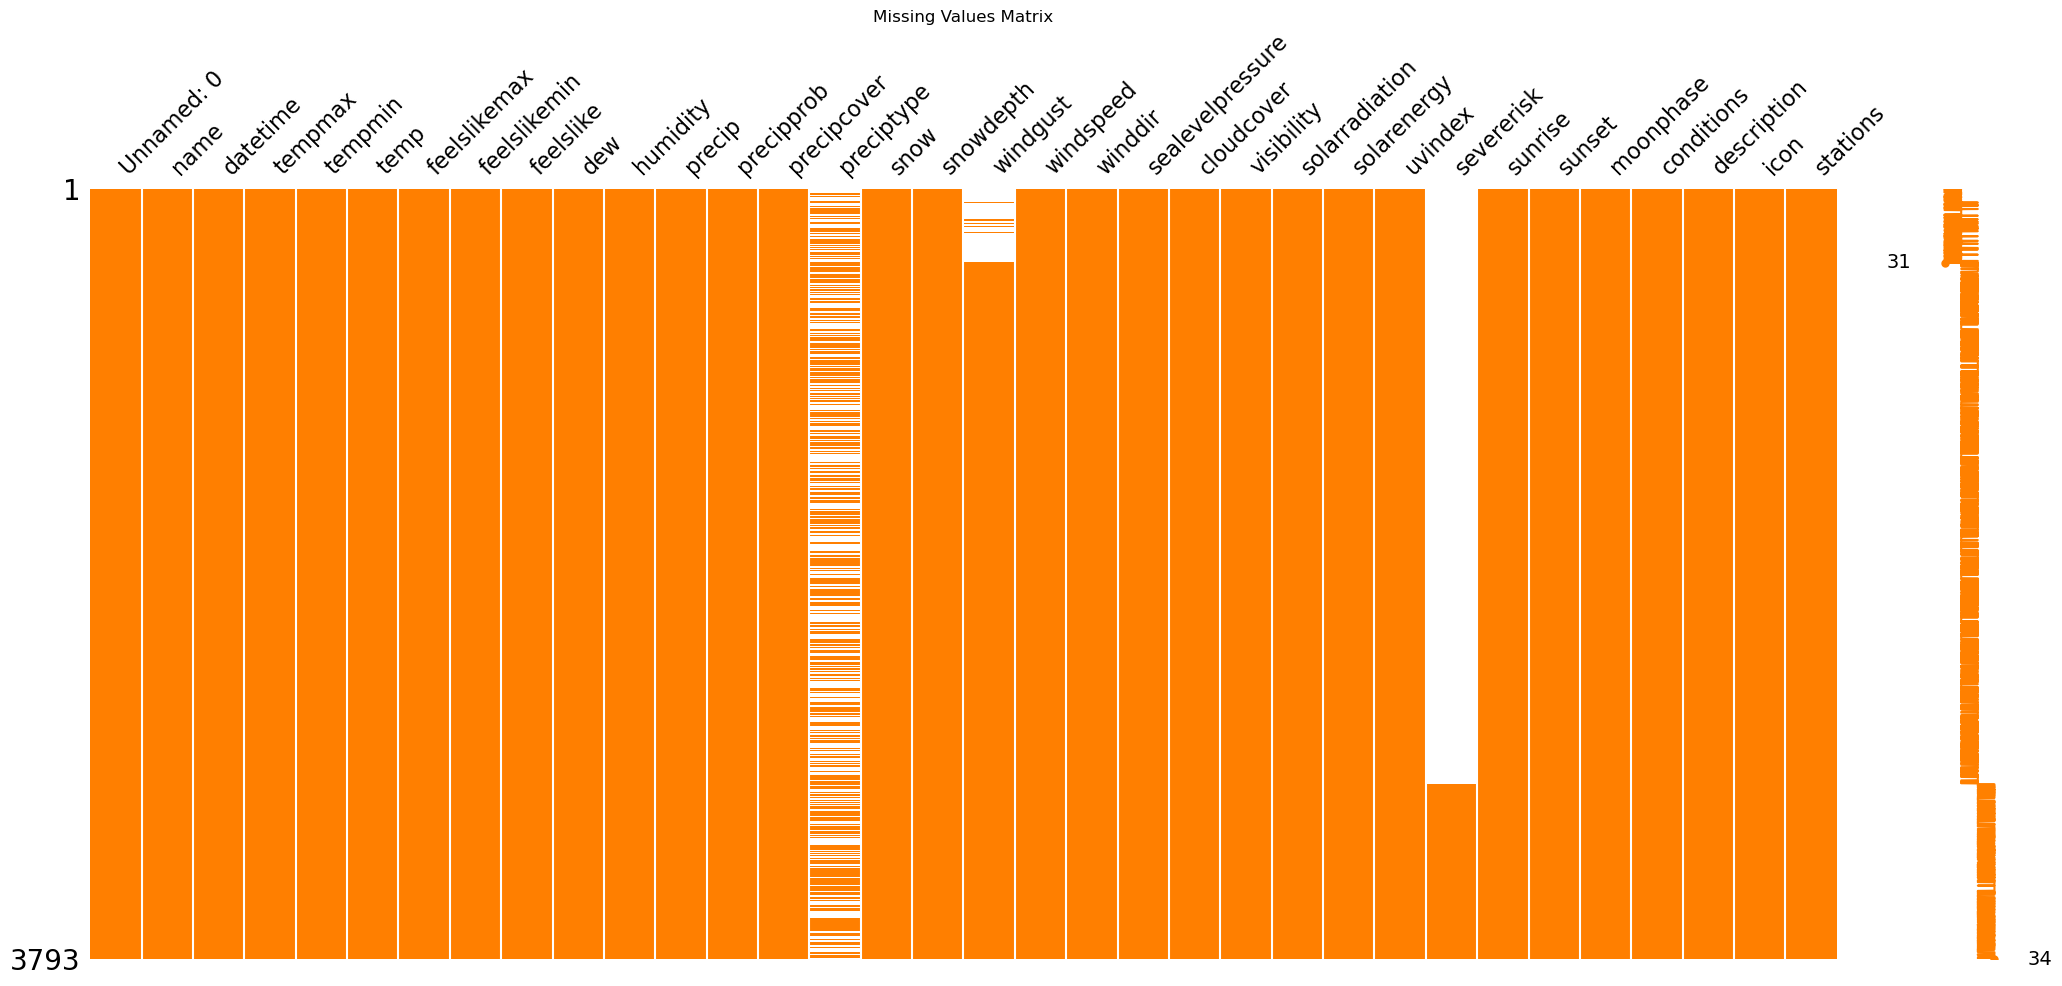

In [18]:
import missingno as msno
msno.matrix(df_bujanovac, color=(1.0, 0.5, 0.0))
plt.title('Missing Values Matrix')
plt.show()

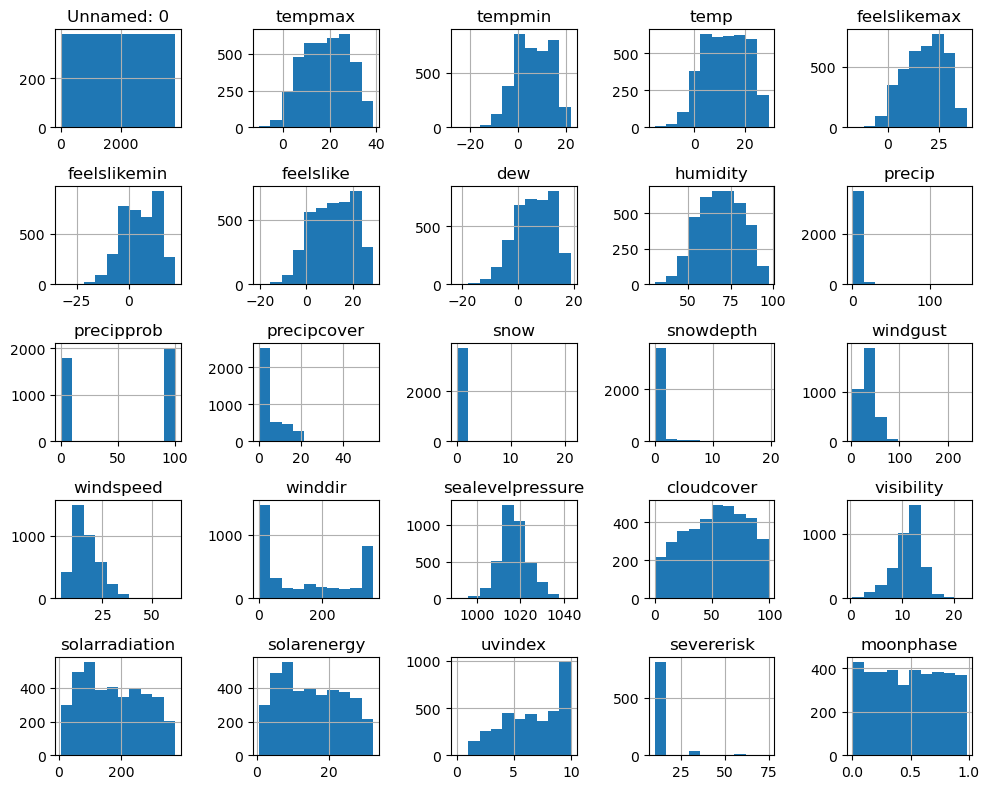

In [19]:
df_bujanovac.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

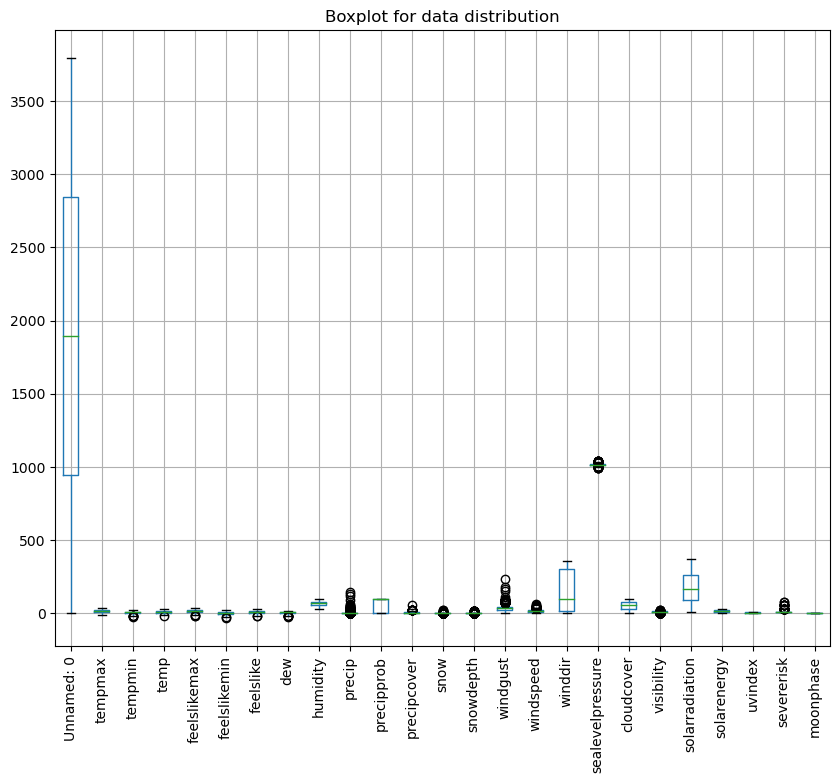

In [20]:
df_bujanovac.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Boxplot for data distribution')
plt.show()

In [21]:
corr_matrix = df_bujanovac.corr()
print(corr_matrix) 

                  Unnamed: 0   tempmax   tempmin      temp  feelslikemax  \
Unnamed: 0          1.000000  0.029107  0.000128  0.016867      0.031596   
tempmax             0.029107  1.000000  0.870212  0.972375      0.995948   
tempmin             0.000128  0.870212  1.000000  0.954692      0.867703   
temp                0.016867  0.972375  0.954692  1.000000      0.967612   
feelslikemax        0.031596  0.995948  0.867703  0.967612      1.000000   
feelslikemin        0.012561  0.884604  0.992256  0.959629      0.884776   
feelslike           0.020241  0.974145  0.948723  0.996701      0.974694   
dew                 0.019348  0.846782  0.956185  0.917510      0.852957   
humidity            0.025943 -0.624824 -0.369330 -0.551934     -0.602639   
precip             -0.013369 -0.110592  0.030887 -0.051192     -0.108457   
precipprob          0.000450 -0.190874  0.109723 -0.064850     -0.187335   
precipcover         0.030013 -0.258450  0.065910 -0.123686     -0.255170   
snow        

C:\Users\nicol\AppData\Local\Temp\ipykernel_37132\757997256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_bujanovac.corr()


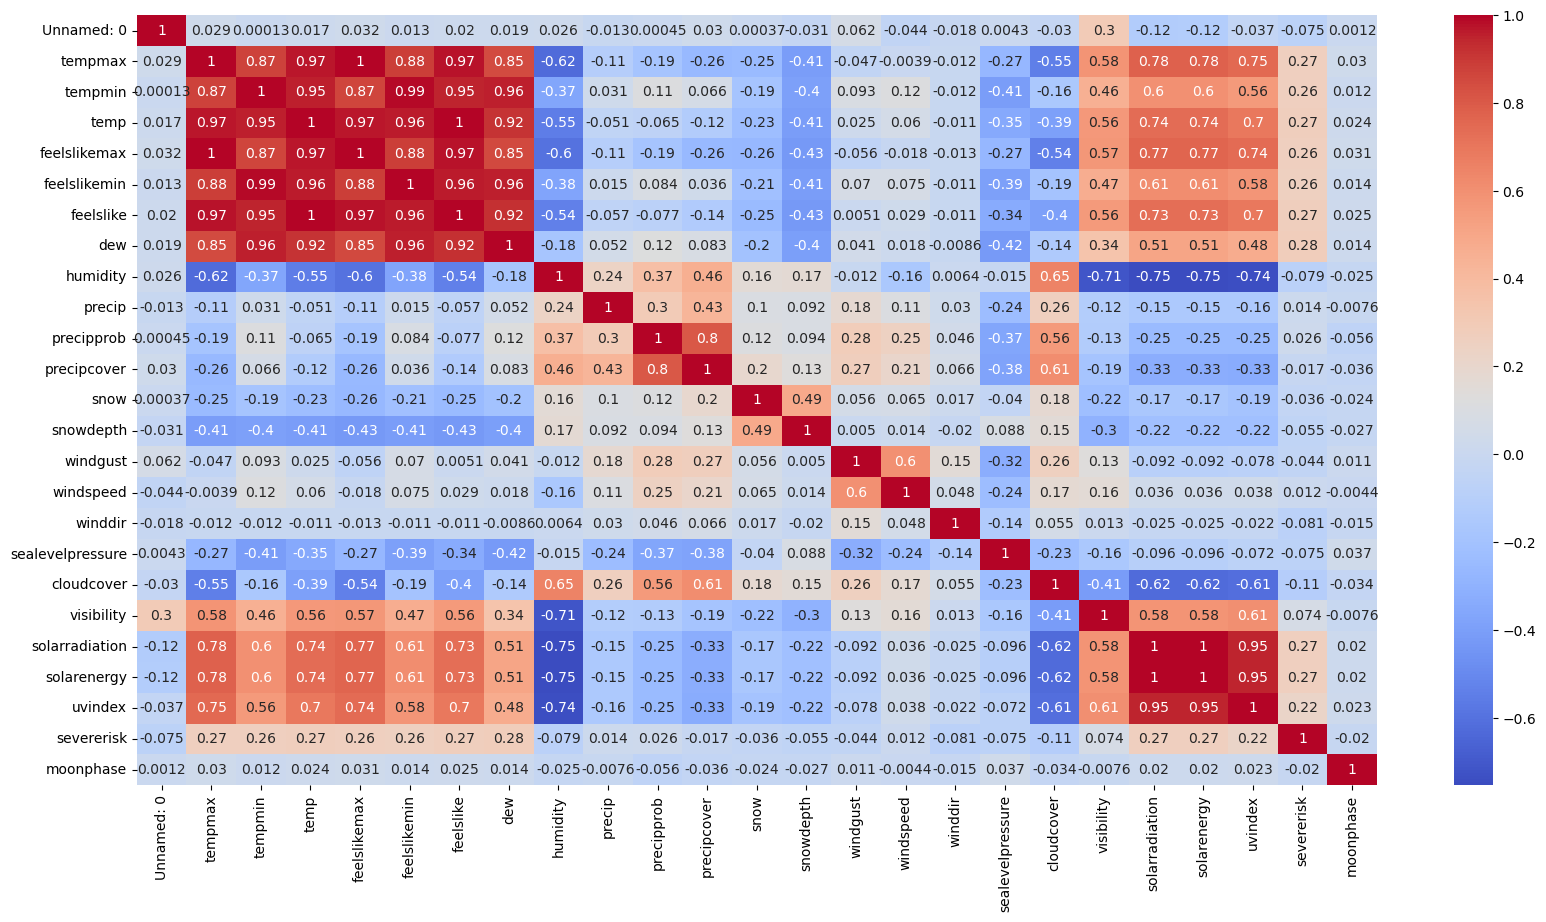

In [22]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

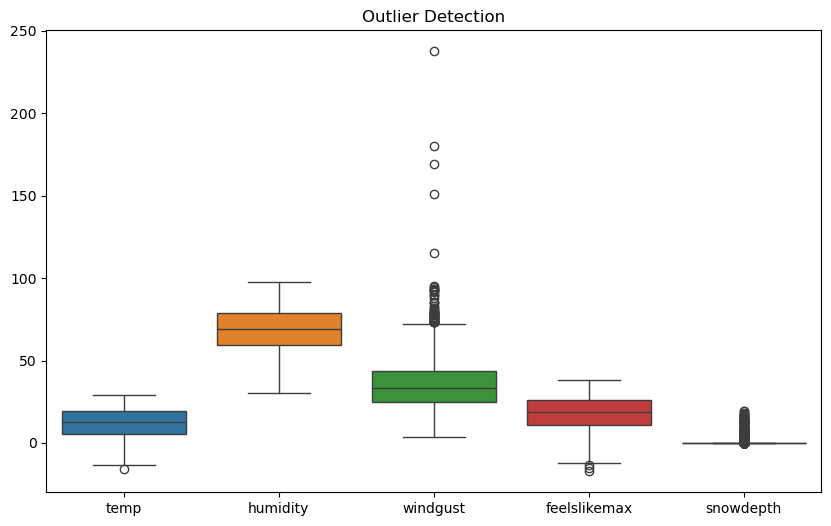

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bujanovac[['temp', 'humidity', 'windgust', 'feelslikemax', 'snowdepth']])
plt.title("Outlier Detection")
plt.show()

## Missing values

In [25]:
#run k-nn to fill in the missing values with the k nearest neighbour 
#https://www.sciencedirect.com/science/article/abs/pii/S0164121212001586#:~:text=kNN%20imputation%20is%20designed%20to,or%20attribute)%20is%20categorical%2C%20referred

imputer = KNNImputer(n_neighbors=5)
df_bujanovac[['windgust', 'severerisk']] = imputer.fit_transform(df_bujanovac[['windgust', 'severerisk']])


In [26]:
df_bujanovac['preciptype'].unique()

array([nan, 'rain', 'rain,snow', 'snow'], dtype=object)

In [27]:
df_bujanovac['preciptype'].value_counts()

rain         1683
rain,snow     320
snow           52
Name: preciptype, dtype: int64

In [32]:
df_bujanovac.isna().sum()

Unnamed: 0          0
name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [29]:
#using forward fill to fill in categorical missing data for the preciptype column

df_bujanovac['preciptype'].fillna(method='ffill', inplace=True)

In [31]:
#using backward fill to fill in categorical missing data for the preciptype column

df_bujanovac['preciptype'] = df_bujanovac['preciptype'].fillna(method='bfill')

In [ ]:
df_bujanovac.isna().sum()

## Droppping unnecessary columns

In [33]:
columns_to_drop = ['Unnamed: 0',  'tempmax', 'tempmin', 'icon', 'stations', 'conditions' ]
df_bujanovac = df_bujanovac.drop(columns=columns_to_drop)

## Tokenization of the preciptype column

In [34]:
# step 1: Text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

In [35]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [36]:
# fitting the model on the 'Occupation' column
text_features = pipeline.fit_transform(df_bujanovac['preciptype'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
df_bujanovac['preciptype_clusters'] = kmeans.labels_
df_bujanovac['preciptype_clusters'].value_counts()

1    3087
0     620
2      86
Name: preciptype_clusters, dtype: int64

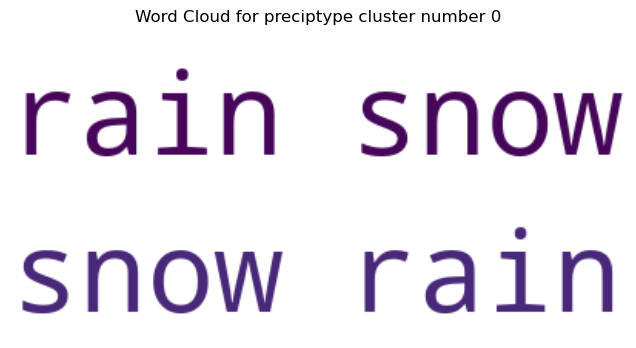

In [38]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['preciptype_clusters']==0]['preciptype'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for preciptype cluster number 0')
plt.show()

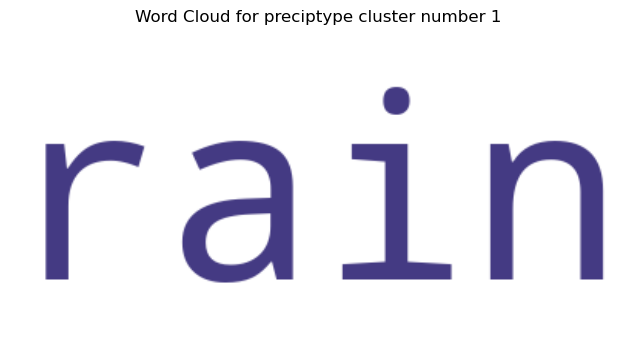

In [39]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['preciptype_clusters']==1]['preciptype'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for preciptype cluster number 1')
plt.show()

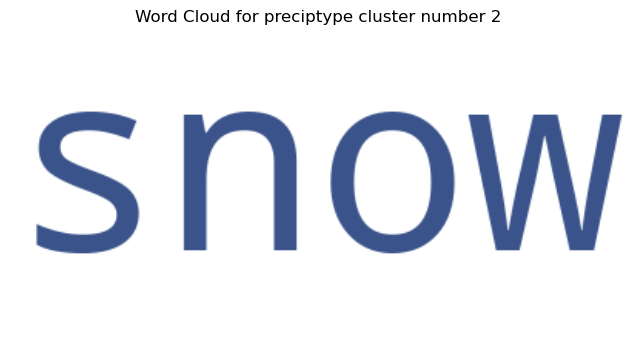

In [40]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['preciptype_clusters']==2]['preciptype'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for preciptype cluster number 2')
plt.show()

In [41]:
df_bujanovac['preciptype_clusters'].value_counts()

1    3087
0     620
2      86
Name: preciptype_clusters, dtype: int64

In [42]:
df_bujanovac = df_bujanovac.drop(columns=['preciptype'])

## Tokenization of the "description" column

In [43]:
# step 1: text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)

In [44]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [45]:
# fitting the model on the 'Short description' column
text_features = pipeline.fit_transform(df_bujanovac['description'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
kmeans.labels_
df_bujanovac['clusters_description'] = kmeans.labels_

In [47]:
df_bujanovac['clusters_description'].value_counts()

3    1141
5    1135
4     501
2     463
1     283
0     270
Name: clusters_description, dtype: int64

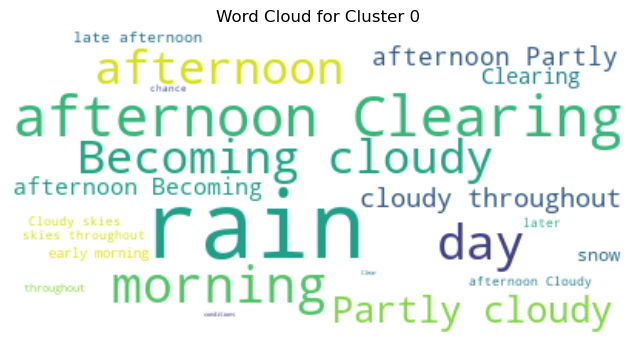

In [48]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['clusters_description']==0]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0')
plt.show()

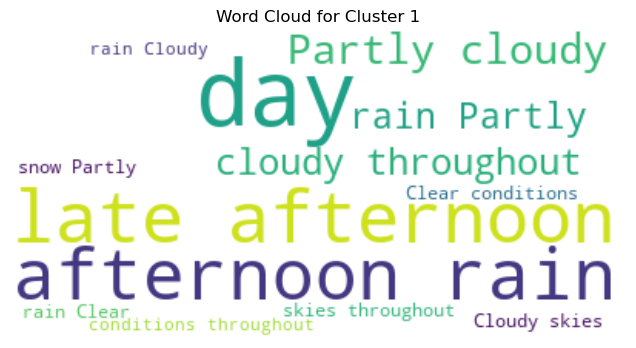

In [49]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['clusters_description']==1]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 1')
plt.show()

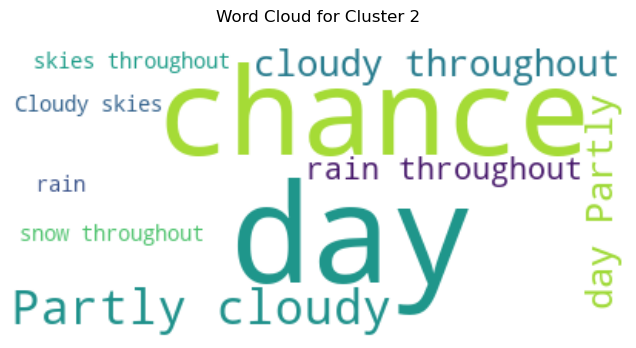

In [50]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['clusters_description']==2]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 2')
plt.show()

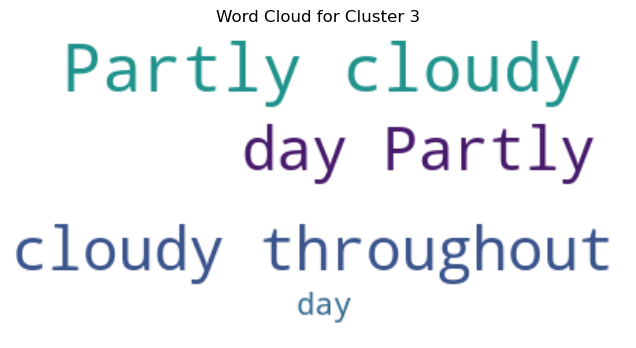

In [51]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['clusters_description']==3]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 3')
plt.show()

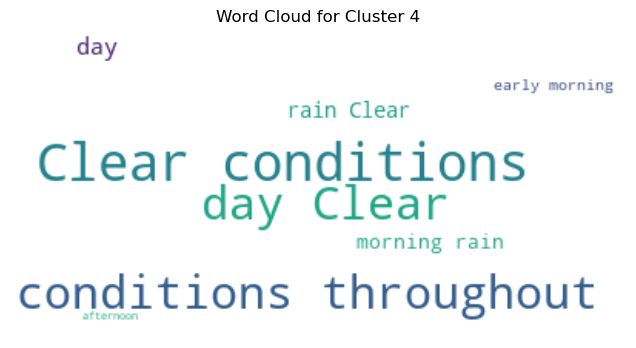

In [52]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['clusters_description']==4]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 4')
plt.show()

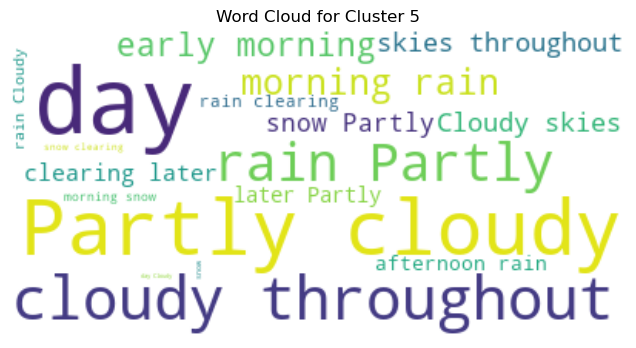

In [53]:
text = ' '.join(description for description in df_bujanovac[df_bujanovac['clusters_description']==5]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 5')
plt.show()

In [54]:
df_bujanovac = df_bujanovac.drop(columns=['description'])
df_bujanovac

,name,datetime,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,preciptype_clusters,clusters_description
0,"Bujanovac, Serbia",2014-01-01,4.3,6.6,0.0,3.8,2.1,86.2,0.000,0,0.00,0.0,0.0,35.837713,8.4,40.9,1021.8,87.6,6.7,76.4,6.6,4,11.566125,2014-01-01T07:02:35,2014-01-01T16:10:28,0.00,1,3
1,"Bujanovac, Serbia",2014-01-02,3.7,7.6,0.5,3.5,1.0,83.1,0.000,0,0.00,0.0,0.0,35.837713,6.3,48.4,1020.9,72.0,8.0,63.7,5.5,3,11.566125,2014-01-02T07:02:39,2014-01-02T16:11:20,0.03,1,3
2,"Bujanovac, Serbia",2014-01-03,3.3,5.7,1.4,3.2,1.4,87.0,0.000,0,0.00,0.0,0.0,35.837713,6.0,48.5,1023.1,88.1,5.4,62.9,5.4,3,11.566125,2014-01-03T07:02:41,2014-01-03T16:12:15,0.07,1,3
3,"Bujanovac, Serbia",2014-01-04,2.5,4.0,-2.2,1.7,1.3,91.8,0.000,0,0.00,0.0,0.0,35.837713,9.9,244.8,1025.1,87.4,4.1,90.9,7.8,4,11.566125,2014-01-04T07:02:41,2014-01-04T16:13:11,0.10,1,3
4,"Bujanovac, Serbia",2014-01-05,3.3,5.3,-2.6,1.2,1.8,90.1,0.121,100,4.17,0.0,0.0,35.837713,13.9,234.6,1019.5,91.0,6.3,22.3,1.9,1,11.566125,2014-01-05T07:02:38,2014-01-05T16:14:08,0.14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,"Bujanovac, Serbia",2024-05-16,12.5,13.9,11.0,12.5,11.0,90.7,2.937,100,16.67,0.0,0.0,73.400000,18.5,152.2,1017.9,95.0,10.4,154.2,13.3,8,10.000000,2024-05-16T05:10:00,2024-05-16T19:49:22,0.27,1,2
3789,"Bujanovac, Serbia",2024-05-17,15.9,21.8,11.4,15.9,12.2,80.0,0.073,100,4.17,0.0,0.0,62.300000,14.3,175.0,1015.6,68.5,13.1,234.5,20.3,9,10.000000,2024-05-17T05:09:02,2024-05-17T19:50:23,0.30,1,5
3790,"Bujanovac, Serbia",2024-05-18,18.7,26.4,10.2,18.7,13.2,73.6,0.000,0,0.00,0.0,0.0,41.000000,9.8,182.4,1015.5,49.1,12.0,302.8,26.3,10,10.000000,2024-05-18T05:08:06,2024-05-18T19:51:23,0.33,1,3
3791,"Bujanovac, Serbia",2024-05-19,19.4,23.9,15.6,19.4,16.3,83.2,2.286,100,8.33,0.0,0.0,47.500000,9.5,107.2,1013.1,71.9,11.3,162.1,13.8,9,10.000000,2024-05-19T05:07:12,2024-05-19T19:52:22,0.37,1,5


## Download of updated dataframe

In [55]:
# folder_path = r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data'
# file_name = 'bujanovac_weather_2014-2024_updated.csv'
# full_path = os.path.join(folder_path, file_name)

# # save the DataFrame to the specified path
# df_bujanovac.to_csv(full_path)